# Sustainable_Energy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
import random as random

# Open CSV
energy = "Energy.csv"
gdp_data="GDP_file.csv"
education = "Index Education.csv"
population_brasil = "Population_brasil.csv"
population_mexico = "Population_mexico.csv"


# Read files
energy = pd.read_csv(energy, thousands=',')
gdp_data = pd.read_csv(gdp_data, thousands=',')
education = pd.read_csv(education)
population_mexico_df = pd.read_csv(population_mexico)
population_brasil_df = pd.read_csv(population_brasil)


# Exclude NA for Energy dataset and fill na with 0 for GDP dataset
energy.dropna()
gdp_data=gdp_data.fillna(0)



In [26]:
#Clean data and create dataframe
energy_df = energy.iloc[:,0:7]
del energy_df["Renewable energy consumption (TJ) "]
del energy_df["Renewable energy share of (%)"]

# removing the years that are not relevant
time=[2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]
new_energy_df=energy_df[["Country", "Time"," Renewable electricity output (GWh)  "," Total electricity output (GWh)  "]]
new_energy_df

# Create a new dataframe with only brasil 2006 - 2016
brasil_df=new_energy_df.loc[new_energy_df["Country"] =="Brazil", :]
# Create a new dataframe with only mexico 2006 - 2016
mexico_df=new_energy_df.loc[new_energy_df["Country"] =="Mexico", :]


In [4]:
#Sorting the data of brasil by year
brasil_cols = brasil_df.columns.values
 = brasil_df.sort_values('Time')
brasil_df


,Country,Time,Renewable electricity output (GWh),Total electricity output (GWh)
0,Brazil,2006,363765,419337
1,Brazil,2007,392685,445147
2,Brazil,2008,390210,463067
3,Brazil,2009,414828,466121
10,Brazil,2010,436961,515745
4,Brazil,2011,463272,531757
5,Brazil,2012,455629,552624
6,Brazil,2013,437969,571088
9,Brazil,2014,431660,590632
8,Brazil,2015,430230,581652


In [5]:
#Sorting the data of mexico by year
mexico_cols = mexico_df.columns.values
mexico_df = mexico_df.sort_values('Time')
mexico_df

,Country,Time,Renewable electricity output (GWh),Total electricity output (GWh)
11,Mexico,2006,39532,257750
12,Mexico,2007,37378,265208
13,Mexico,2008,47246,269315
14,Mexico,2009,34667,267754
21,Mexico,2010,45747,275537
15,Mexico,2011,45076,302785
16,Mexico,2012,42361,307268
17,Mexico,2013,39543,297326
20,Mexico,2014,52893,301496
19,Mexico,2015,47897,311138


In [6]:
#Brasil variables produced energy
brasil_time_energy = brasil_df[[ brasil_cols[1],brasil_cols[2],brasil_cols[3]]]
b_time=[2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]

#Renewable electricity output brasil series
b_ren_energy = brasil_time_energy[brasil_cols[2]]
#Total electricity output
b_tot_energy = brasil_time_energy[brasil_cols[3]]

#Mexico variables produced energy series
mexico_time_energy = mexico_df[[ mexico_cols[2],mexico_cols[3],mexico_cols[1]]]
m_time = mexico_time_energy[mexico_cols[1]]

#Renewable electricity output mexico series
m_ren_energy = mexico_time_energy[mexico_cols[2]]
#Total electricity output mexico series
m_tot_energy = mexico_time_energy[mexico_cols[3]]



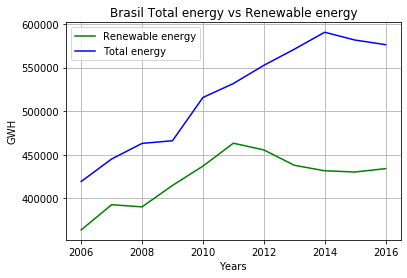

In [7]:
# Graph to compare total Energy Brazil vs Renewable Energy Brasil
plt.title("Brasil Total energy vs Renewable energy")
plt.xlabel("Years")
plt.ylabel("GWH")
plt.grid()
plt.plot(m_time,b_ren_energy, color="green", label="Renewable energy")
plt.plot(m_time,b_tot_energy, color="blue", label="Total energy")
plt.legend(loc="best")
plt.savefig("Brasil Total energy vs Renewable energy.png")
plt.show()

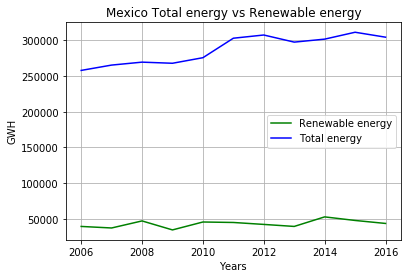

In [8]:
# Graph to compare total Energy Brazil vs Renewable Energy Brasil
plt.title("Mexico Total energy vs Renewable energy")
plt.xlabel("Years")
plt.ylabel("GWH")
plt.grid()
plt.plot(m_time,m_ren_energy, color="green", label="Renewable energy")
plt.plot(m_time,m_tot_energy, color="blue", label="Total energy")
plt.legend(loc="best")
plt.savefig("Mexico Total energy vs Renewable energy.png")
plt.show()

# GDP

In [9]:
#Filter country code for MEX and BRA 
gdp_MEXBRA = gdp_data.loc[(gdp_data["Country Code"] =="MEX") | (gdp_data["Country Code"]=="BRA")]
gdp_MEXBRA

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
27,Brazil,BRA,GDP (current US$),NY.GDP.MKTP.CD,1.516557e+10,1.523685e+10,1.992629e+10,2.302148e+10,2.121189e+10,2.179004e+10,...,2.210000e+12,2.620000e+12,2.470000e+12,2.470000e+12,2.460000e+12,1.800000e+12,1.800000e+12,2.050000e+12,1.870000e+12,0.0
152,Mexico,MEX,GDP (current US$),NY.GDP.MKTP.CD,1.304000e+10,1.416000e+10,1.520000e+10,1.696000e+10,2.008000e+10,2.184000e+10,...,1.060000e+12,1.180000e+12,1.200000e+12,1.270000e+12,1.310000e+12,1.170000e+12,1.080000e+12,1.160000e+12,1.220000e+12,0.0


In [10]:
#Select Columns
gdp_df = gdp_MEXBRA[['Country Code',
                   'Country Name',
                   '2006',
                   '2007',
                   '2008',
                   '2009',
                   '2010',
                   '2011',
                   '2012',
                   '2013',
                   '2014',
                   '2015',
                   '2016']]
gdp_df.dropna()
gdp_df.head(5)

,Country Code,Country Name,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
27,BRA,Brazil,1.110000e+12,1.400000e+12,1.700000e+12,1.670000e+12,2.210000e+12,2.620000e+12,2.470000e+12,2.470000e+12,2.460000e+12,1.800000e+12,1.800000e+12
152,MEX,Mexico,9.750000e+11,1.050000e+12,1.110000e+12,9.000000e+11,1.060000e+12,1.180000e+12,1.200000e+12,1.270000e+12,1.310000e+12,1.170000e+12,1.080000e+12


In [11]:
#Transpose columns
gdp_df_transposed = pd.melt(gdp_df,
                            id_vars=["Country Code"],
                            value_vars=["2006","2007","2008","2009","2010","2011","2012", "2013", "2014", "2015", "2016"],
                            var_name = "Year",
                            value_name="GDP Index")
gdp_df_transposed

,Country Code,Year,GDP Index
0,BRA,2006,1.110000e+12
1,MEX,2006,9.750000e+11
2,BRA,2007,1.400000e+12
3,MEX,2007,1.050000e+12
4,BRA,2008,1.700000e+12
5,MEX,2008,1.110000e+12
6,BRA,2009,1.670000e+12
7,MEX,2009,9.000000e+11
8,BRA,2010,2.210000e+12
9,MEX,2010,1.060000e+12


In [12]:
x_axis = np.arange(len(gdp_df_transposed))

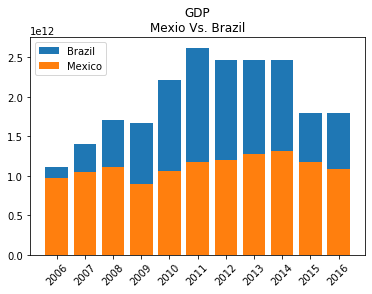

In [13]:
# gdp_df_transposed.groupby("Country Code").agg(["count","mean", "sum"])
# gdp_df_transposed.groupby(["Country Code","Year"]).mean().plot(kind='bar')
# gdp_df_transposed.groupby(["Year","Country Code"]).mean().plot(kind='bar')
bra=gdp_df_transposed.loc[gdp_df_transposed["Country Code"]=="BRA"]
mex=gdp_df_transposed.loc[gdp_df_transposed["Country Code"]=="MEX"]
plt.bar(bra.Year,bra["GDP Index"],label='Brazil')
plt.bar(mex.Year,mex["GDP Index"],label='Mexico')
plt.legend()
plt.xticks(rotation=45)
plt.title("GDP\nMexio Vs. Brazil")
plt.savefig("GDP_Mex_vs_Bra.png")



# Education

In [14]:
#Filter Education Code - School enrollment, primary (% gross)

education = education.loc[education["Indicator Code"] =="SE.PRM.ENRR", :]
education.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
122,Aruba,ABW,"School enrollment, primary (% gross)",SE.PRM.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,113.79430,105.25590,104.08710,116.03930,117.1081,NaN,NaN,NaN,NaN,NaN
276,Afghanistan,AFG,"School enrollment, primary (% gross)",SE.PRM.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,100.07170,97.64164,103.49240,104.49840,105.9197,105.7785,NaN,102.3105,NaN,NaN
430,Angola,AGO,"School enrollment, primary (% gross)",SE.PRM.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,105.78100,119.53010,NaN,NaN,NaN,113.4780,NaN,NaN,NaN,NaN
584,Albania,ALB,"School enrollment, primary (% gross)",SE.PRM.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,93.49047,95.00608,97.58513,99.98391,104.1080,105.5430,105.5539,107.0466,106.9934,NaN
738,Andorra,AND,"School enrollment, primary (% gross)",SE.PRM.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Filter Country Code - BRA and MEX
educationBRMX = education.loc[(education["Country Code"] =="MEX") | (education["Country Code"] =="BRA")]
educationBRMX

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
4280,Brazil,BRA,"School enrollment, primary (% gross)",SE.PRM.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,132.4966,134.5204,113.9198,114.2547,112.7733,113.9454,115.4478,NaN,NaN
23530,Mexico,MEX,"School enrollment, primary (% gross)",SE.PRM.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,110.6335,110.5408,110.4135,109.4415,108.0058,106.6061,106.2777,105.7700,NaN,NaN


In [16]:
#Select Columns
df = educationBRMX[["Country Code", "2006","2007","2008","2009","2010","2011","2012", "2013", "2014", "2015", "2016"]]
#df = df.dropna()
df

,Country Code,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
4280,BRA,NaN,128.17979,132.05521,131.16516,NaN,132.4966,134.5204,113.9198,114.2547,112.7733,113.9454
23530,MEX,108.17477,108.79971,109.42442,110.54528,110.6335,110.5408,110.4135,109.4415,108.0058,106.6061,106.2777


In [17]:
#Complete NaN data
new_df_na = pd.melt(df,id_vars=["Country Code"],value_vars=["2006","2007","2008","2009","2010","2011","2012", "2013", "2014", "2015", "2016"], var_name = "Year",value_name="Education Index")
new_df_na.fillna(method='bfill', inplace=True)
new_df_na

,Country Code,Year,Education Index
0,BRA,2006,108.17477
1,MEX,2006,108.17477
2,BRA,2007,128.17979
3,MEX,2007,108.79971
4,BRA,2008,132.05521
5,MEX,2008,109.42442
6,BRA,2009,131.16516
7,MEX,2009,110.54528
8,BRA,2010,110.63350
9,MEX,2010,110.63350


In [18]:
#Create BRA and MEX variables
bra_education=new_df_na.loc[new_df_na["Country Code"]=="BRA"]
mex_education=new_df_na.loc[new_df_na["Country Code"]=="MEX"]
bra_education

,Country Code,Year,Education Index
0,BRA,2006,108.17477
2,BRA,2007,128.17979
4,BRA,2008,132.05521
6,BRA,2009,131.16516
8,BRA,2010,110.63350
10,BRA,2011,132.49660
12,BRA,2012,134.52040
14,BRA,2013,113.91980
16,BRA,2014,114.25470
18,BRA,2015,112.77330


# Population

In [19]:
# merge the mexico and brasil dataframe

countries_population_df = pd.concat([population_brasil_df,population_mexico_df])
countries_population_df = countries_population_df.sort_values(by=['year']).reset_index()

# Getting the years of 2006 - 2016
indexNames = countries_population_df[ countries_population_df['year'] < 2006 ].index
countries_population_df.drop(indexNames , inplace=True)

indexNames = countries_population_df[ countries_population_df['year'] > 2016 ].index
countries_population_df.drop(indexNames , inplace=True)

# Create a individual data frames for mexico and brasil
mexico_population_df=countries_population_df.loc[countries_population_df["Country Code"]=="MEX"]
brasil_population_df=countries_population_df.loc[countries_population_df["Country Code"]=="BRA"]
#Create BRA and MEX variables
#bra_population=countries_population_df.loc[countries_population_df["Country Code"]=="BRA"]
#mex_population=countries_population_df.loc[countries_population_df["Country Code"]=="MEX"]

mexico_population_df
brasil_population_df

# brasil_population_df[" population "]=pd.to_numeric(brasil_population_df[" population "],errors='coerce')

# # removing commas from data
# # Brasil
brasil_population_df[" population "] = brasil_population_df[" population "].str.replace(',', '')
brasil_population_df[" female "    ] = brasil_population_df[" female "    ].str.replace(',', '')
brasil_population_df[" man "       ] = brasil_population_df[" man "       ].str.replace(',', '')
# # Mexico
mexico_population_df[" population "] = mexico_population_df[" population "].str.replace(',', '')
mexico_population_df[" female "    ] = mexico_population_df[" female "    ].str.replace(',', '')
mexico_population_df[" man "       ] = mexico_population_df[" man "       ].str.replace(',', '')
mexico_population_df.columns
# convert data to numeric type
# Brasil
brasil_population_df[" population "] = pd.to_numeric(brasil_population_df[" population "],errors='coerce')
brasil_population_df[" female "    ] = pd.to_numeric(brasil_population_df[' female '    ],errors='coerce')
brasil_population_df[" man "       ] = pd.to_numeric(brasil_population_df[" man "       ],errors='coerce')
# Mexico  
mexico_population_df[" population "] = pd.to_numeric(mexico_population_df[" population "],errors='coerce')
mexico_population_df[" female "    ] = pd.to_numeric(mexico_population_df[' female '    ],errors='coerce')
mexico_population_df[" man "       ] = pd.to_numeric(mexico_population_df[" man "       ],errors='coerce')


/Users/choki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/choki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/choki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

# Compare datasets

In [20]:
# Normalize datasets

# GDP
b_gdp=((bra["GDP Index"]-bra["GDP Index"].min())/(bra["GDP Index"].max()-bra["GDP Index"].min()))
m_gdp=((mex["GDP Index"]-mex["GDP Index"].min())/(mex["GDP Index"].max()-mex["GDP Index"].min()))

# Energy
b_energy=((b_ren_energy-b_ren_energy.min())/(b_ren_energy.max()-b_ren_energy.min()))
m_energy=((m_ren_energy-m_ren_energy.min())/(m_ren_energy.max()-m_ren_energy.min()))

# Education
b_education=((bra_education["Education Index"]-bra_education["Education Index"].min())/(bra_education["Education Index"].max()-bra_education["Education Index"].min()))
m_education=((mex_education["Education Index"]-mex_education["Education Index"].min())/(mex_education["Education Index"].max()-mex_education["Education Index"].min()))
m_education
bra_education
# Population
# normalized_population_brasil
b_population=((brasil_population_df[" population "]-brasil_population_df[" population "].min())/(brasil_population_df[" population "].max()-brasil_population_df[" population "].min()))
m_population=((mexico_population_df[" population "]-mexico_population_df[" population "].min())/(mexico_population_df[" population "].max()-mexico_population_df[" population "].min()))



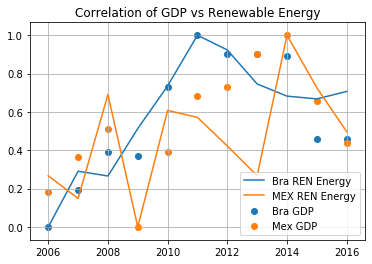

In [21]:
#Correlation GDP vs Reneable Energy
plt.title("Correlation of GDP vs Renewable Energy")
plt.scatter(time, b_gdp, label="Bra GDP")
plt.scatter(time, m_gdp, label="Mex GDP")
plt.plot(time, b_energy, label="Bra REN Energy")
plt.plot(time, m_energy,label="MEX REN Energy")
plt.legend(loc="lower right")
plt.grid()
# plt.savefig("Correlation of GDP vs Renewable Energy.png")
plt.show()

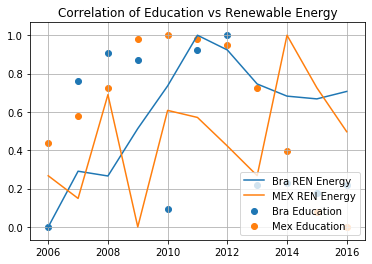

In [22]:
#Correlation Education vs Renewable Energy
plt.title("Correlation of Education vs Renewable Energy")
plt.scatter(time, b_education, label="Bra Education")
plt.scatter(time, m_education, label="Mex Education")
plt.plot(time, b_energy, label="Bra REN Energy")
plt.plot(time, m_energy,label="MEX REN Energy")
plt.legend(loc="lower right")
plt.grid()
# plt.savefig("Correlation of Education vs Renewable Energy.png")
plt.show()

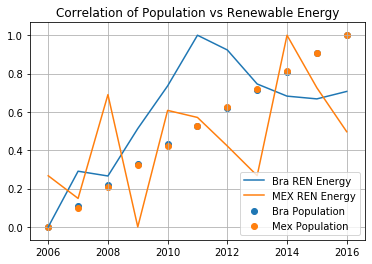

In [23]:
# Correlation Population vs Renewable Energy
plt.title("Correlation of Population vs Renewable Energy")
plt.scatter(time, b_population, label="Bra Population")
plt.scatter(time, m_population, label="Mex Population")
plt.plot(time, b_energy, label="Bra REN Energy")
plt.plot(time, m_energy,label="MEX REN Energy")
plt.legend(loc="lower right")
plt.grid()
# plt.savefig("Correlation of population vs Renewable Energy.png")
plt.show()

#Correlation of population vs Renewable Energy

This graph show the growth of population and the consumption of renewable energy, is is interesting to see that in both contries they have the same percentage of population growth and it is a linear growth of around 10%

/Users/choki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


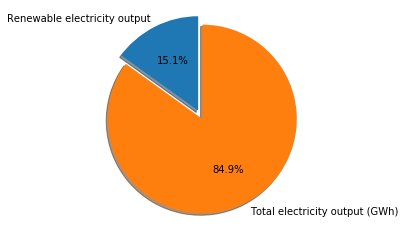

In [45]:
mexico_df["Renewal energy %"] = mexico_df[' Renewable electricity output (GWh)  '] / mexico_df[' Total electricity output (GWh)  ']
mexico_df["Renewal energy %"].mean()


labels = 'Renewable electricity output', 'Total electricity output (GWh)'
sizes = [mexico_df["Renewal energy %"].mean() * 100 , (mexico_df["Renewal energy %"].mean()-1)*-1 * 100]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

/Users/choki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


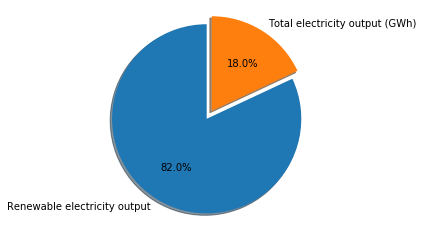

In [46]:
brasil_df["Renewal energy %"] = brasil_df[' Renewable electricity output (GWh)  '] / brasil_df[' Total electricity output (GWh)  ']
brasil_df["Renewal energy %"].mean()


labels = 'Renewable electricity output', 'Total electricity output (GWh)'
sizes = [brasil_df["Renewal energy %"].mean() * 100 , (brasil_df["Renewal energy %"].mean()-1)*-1 * 100]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()